In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp as exp
%matplotlib inline

In [2]:
# Plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
# Make Importable module
class IDnumbers(object):
    def GetFile(self, Mode, WriteString = None, FileName = 'IDnumbers'):
        '''
        self: IDnumbers
        Mode: (a) for writing; (r) for reading
        WriteString: !!! IN STRING FORMAT !!! otherwise TypeError exception gets executed;
                     not required for reading
                           
        FileName: default = IDnumbers; change to create new file
        '''
        try:
            with open(FileName, mode=Mode) as f:
                if Mode == 'a':
                    f.write(str(WriteString) + "\n")
                else:
                    self.IDnumbers_read = f.read()
                    return self.IDnumbers_read.split()
            f.closed       
        except FileNotFoundError:
            print('NOT FOUND -- wrote to disk: ', FileName)
            open(FileName, mode = 'w')
            self.GetFile(Mode='a', FileName=FileName, WriteString = WriteString)
        except TypeError:
            print('ERROR \n')
            print('Please provide input value to write')
    def EraseFile(self, FileName = 'IDnumbers'):
        '''
        Erase content from FILE; change FileName if needed
        '''
        open(FileName, mode='w').close()
        
WriteIO = IDnumbers()

In [4]:
# Set-up Plotly
tls.set_credentials_file(username="jclasul", api_key="MKXHNoKq9cRqNshsRQlh")
tls.set_config_file(sharing="public")

In [5]:
HR = pd.read_csv("HRIN.csv")

# Drop useless variables
# find way to automate without looking at plots
HR.drop(["EmployeeCount","Over18","StandardHours"], axis = 1, inplace=True)

# 35 variables for 1470 persons before drops
HR.shape

(1470, 32)

In [6]:
# List all variables and data types
HR.dtypes.value_counts()

int64     24
object     8
dtype: int64

In [7]:
# Dealing with CATEGORICAL variables
# # # # # # # # # # # #
# Method 1:
# One-Hot encoding
# # # # # # # # # # # #

recast = pd.get_dummies(HR, sparse=True, drop_first=True)
recast_corr = pd.DataFrame.dropna(recast.corr(), axis=[0,1],how="all")

# # # # # # # # # # # #
# Method 2:
# Label Encoding
# # # # # # # # # # # #
#
# Convert all Object dtypes to Categorical

def TO_CAT(col):
    if col.dtype == "object":
        return col.astype("category").cat.codes
    else:
        return col
    
encoding = HR.apply(TO_CAT, axis=0)
encoding_corr = pd.DataFrame.dropna(encoding.corr(), axis=[0,1],how="all")

In [8]:
# Plotly CONTOUR map
# 
# values have to be in LIST for PLOTLY, convert tolist and use COLUMN names for axis
# 

py.iplot([go.Contour(z=recast_corr.values.tolist(),
                   x=recast_corr.columns.tolist(),
                   y=recast_corr.columns.tolist())])

In [9]:
# Plotly CONTOUR map
# 
# values have to be in LIST for PLOTLY, convert tolist and use COLUMN names for axis
# 

py.iplot([go.Contour(z=encoding_corr.values.tolist(),
                   x=encoding_corr.columns.tolist(),
                   y=encoding_corr.columns.tolist())])

In [10]:
# Plotting Function
# Using Encoded labels
#
# To Add: Category names !!
#
def GET_CAT(COLUMN):
    CCDict = {}
    if HR[COLUMN].dtype == 'O': 
        CCats = HR[COLUMN].astype("category").cat.categories.tolist()
        for i,CCat in enumerate(CCats):
            CCDictUpdate = {CCat: i}
            CCDict.update(CCDictUpdate)
        return CCDict
            

def MakeGraph(DATA,INPUT,RESPONSE="Attrition"):
    for VARIABLE in INPUT:
        if VARIABLE == RESPONSE:
            continue
            
        sns.set_style("whitegrid")
        sns.set_palette("muted")
        plt.figure(figsize=(12,5))
        plt.suptitle("{:s} and {:s} graphs".format(VARIABLE,RESPONSE), fontsize="x-large")

        p1 = plt.subplot(2,2,2)
        sns.boxplot(y=DATA[RESPONSE], x=DATA[VARIABLE], orient="h")
        plt.legend()

        p2 = plt.subplot(2,2,4, sharex=p1)
        if RESPONSE == "Attrition":
            sns.distplot(DATA.loc[DATA[RESPONSE] == 0][VARIABLE], label="Stayed")
            sns.distplot(DATA.loc[DATA[RESPONSE] == 1][VARIABLE], label="Left")               
        plt.ylabel("Probability Density")
        plt.legend()

        p3 = plt.subplot(1,2,1)
        sns.pointplot(x=DATA[RESPONSE],y=DATA[VARIABLE], capsize = 0.2)
        plt.show()
        print(GET_CAT(VARIABLE))       

In [11]:
DATA = encoding
INPUT = pd.DataFrame.select_dtypes(DATA, exclude=["object"]).columns
RESPONSE = "Attrition"

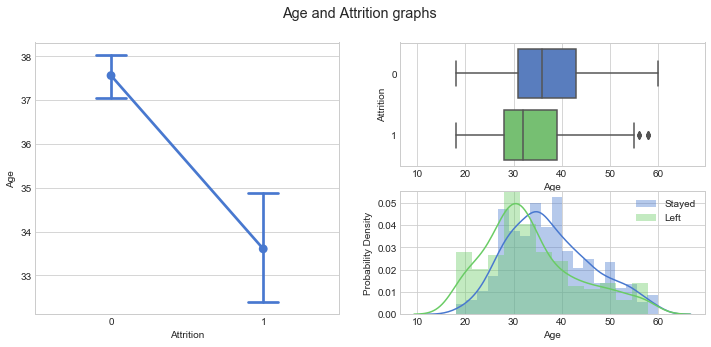

None


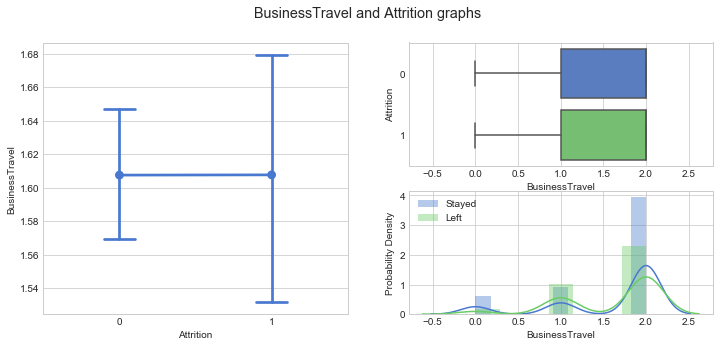

{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}


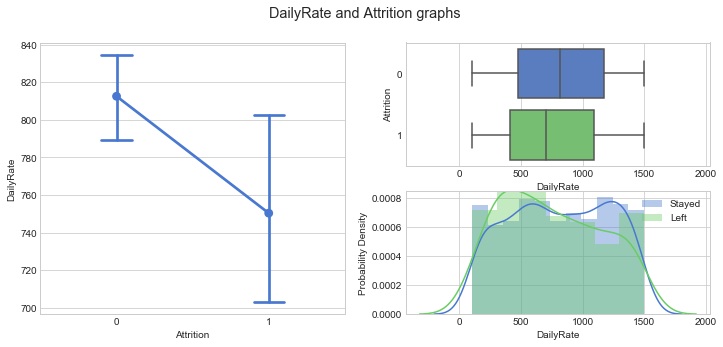

None


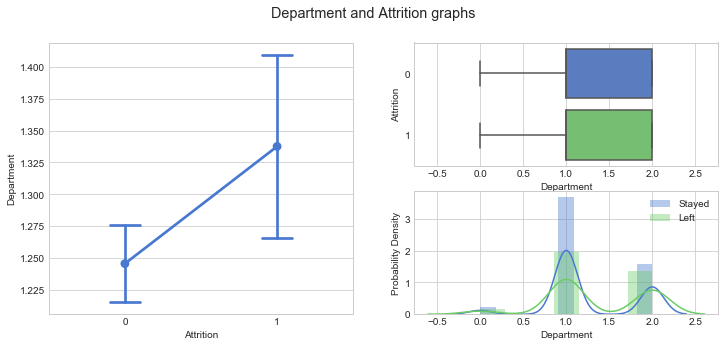

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}


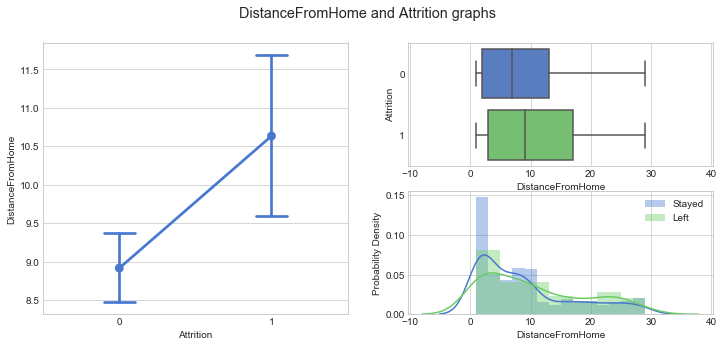

None


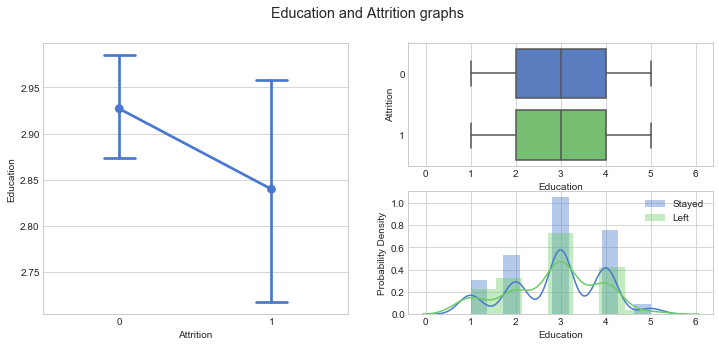

None


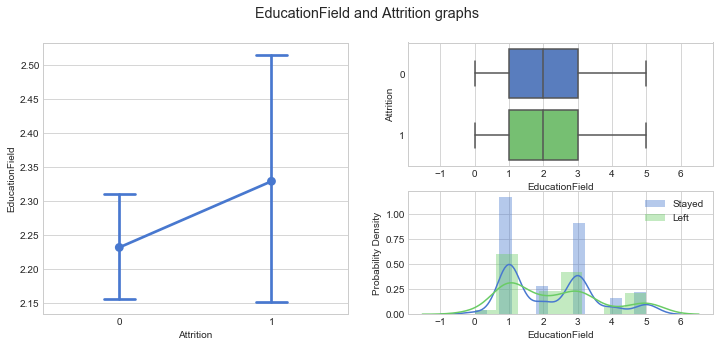

{'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}


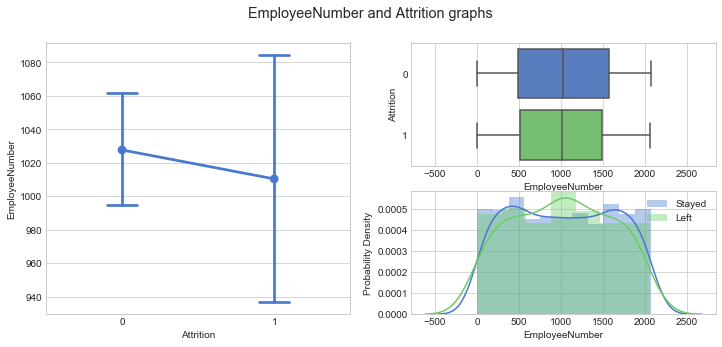

None


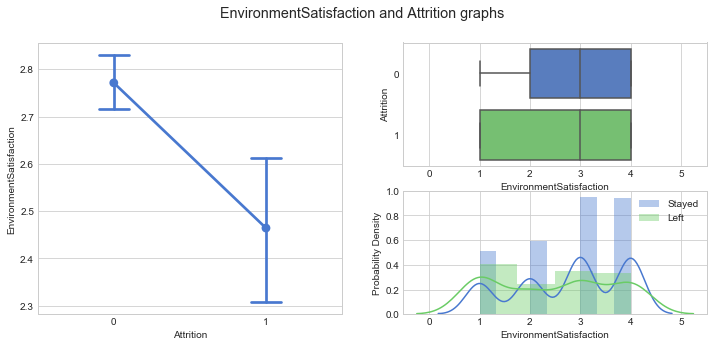

None


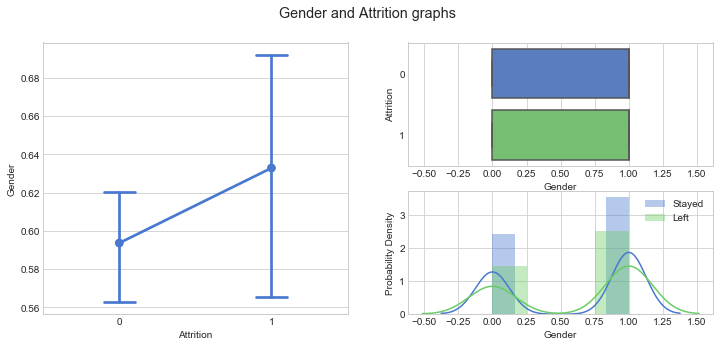

{'Female': 0, 'Male': 1}


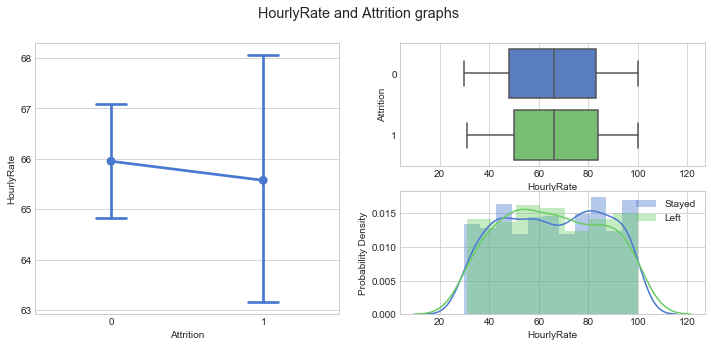

None


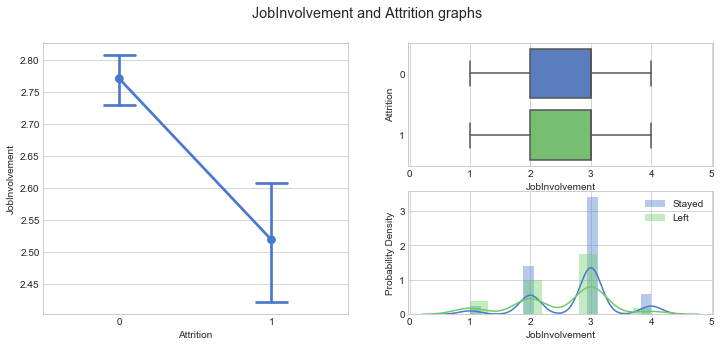

None


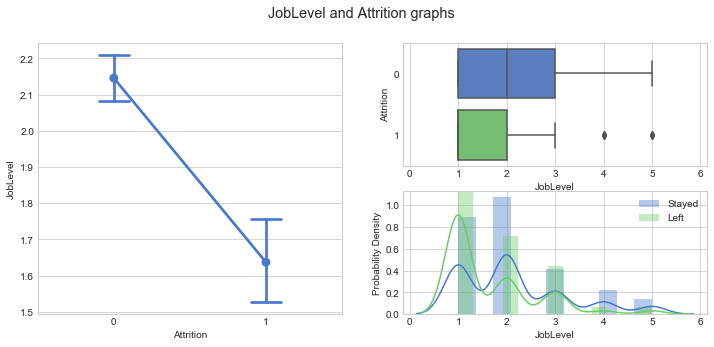

None


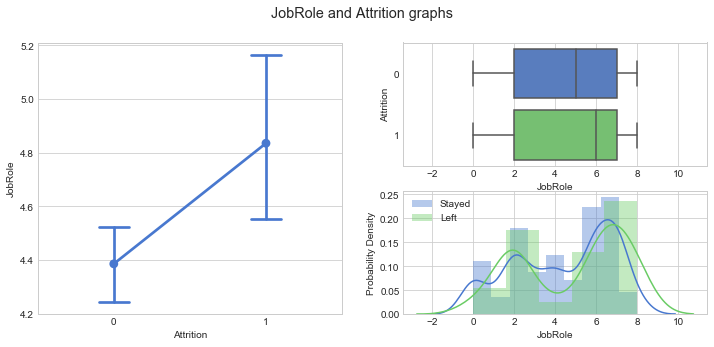

{'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}


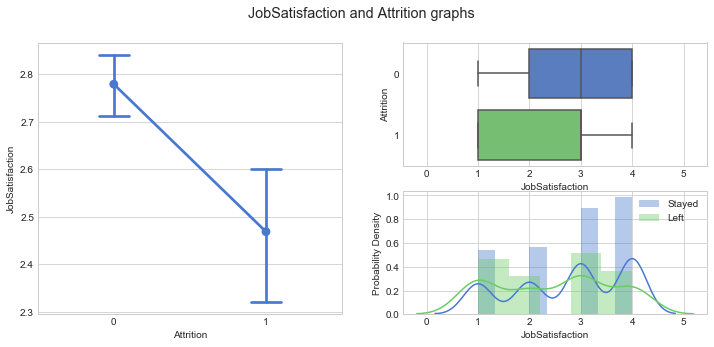

None


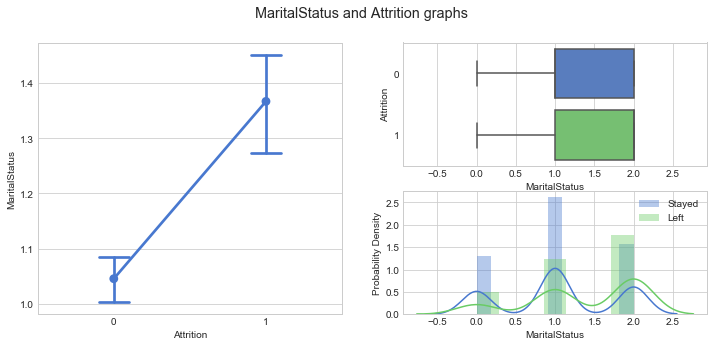

{'Divorced': 0, 'Married': 1, 'Single': 2}


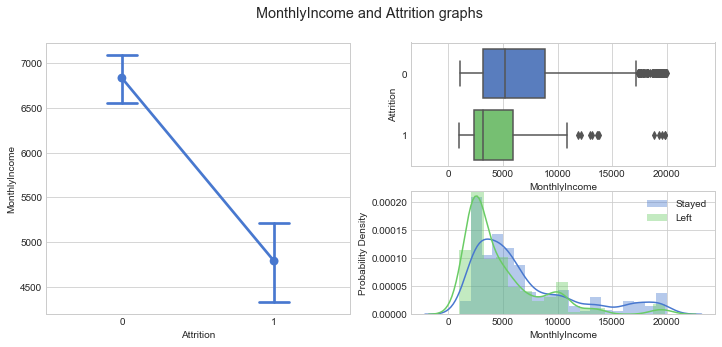

None


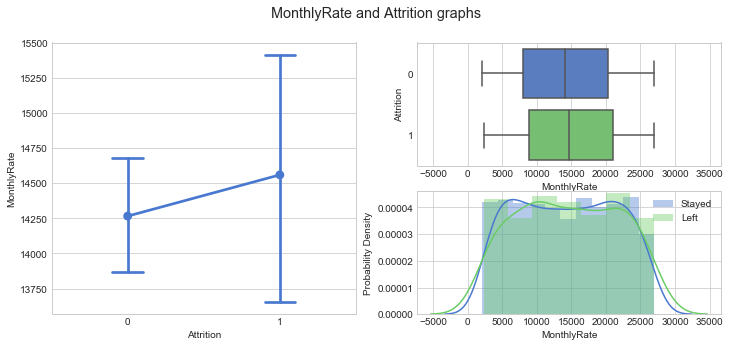

None


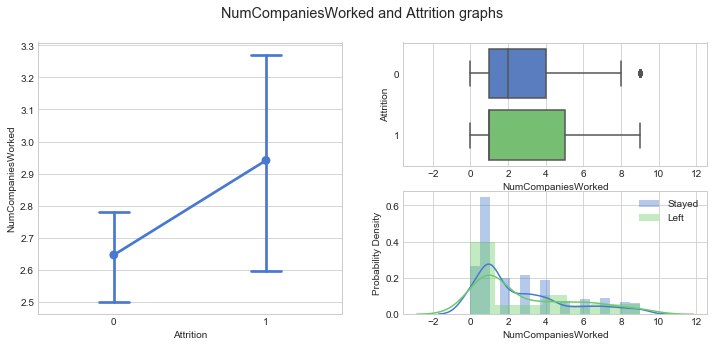

None


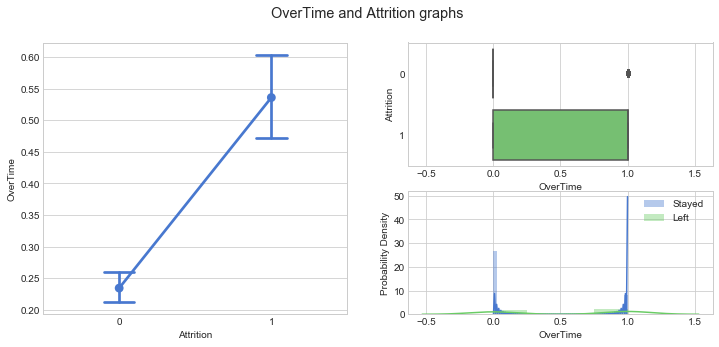

{'No': 0, 'Yes': 1}


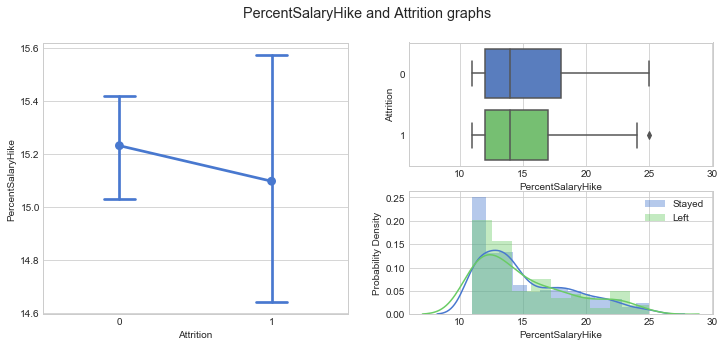

None


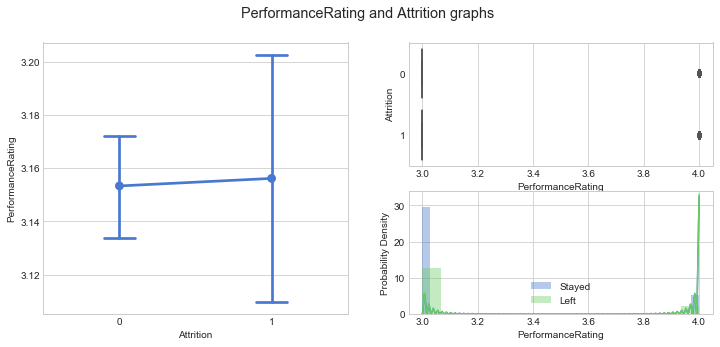

None


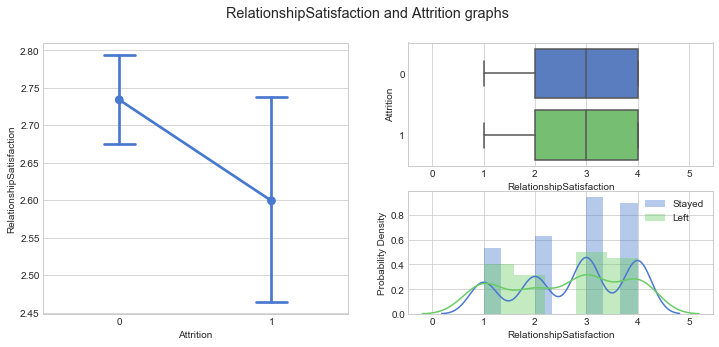

None


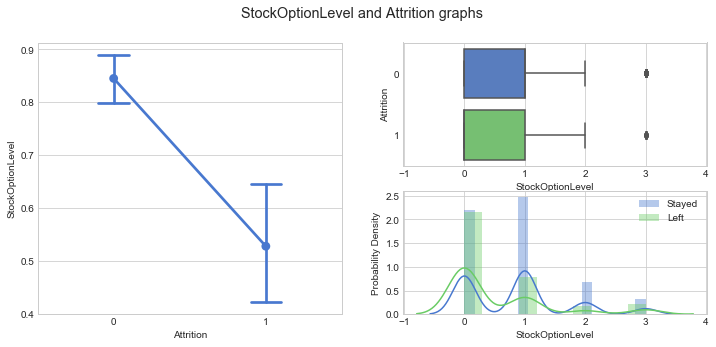

None


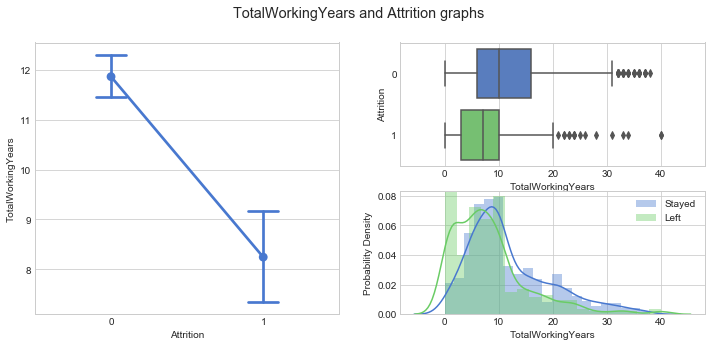

None


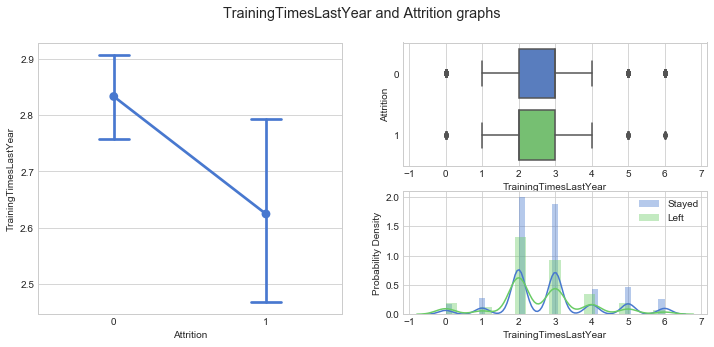

None


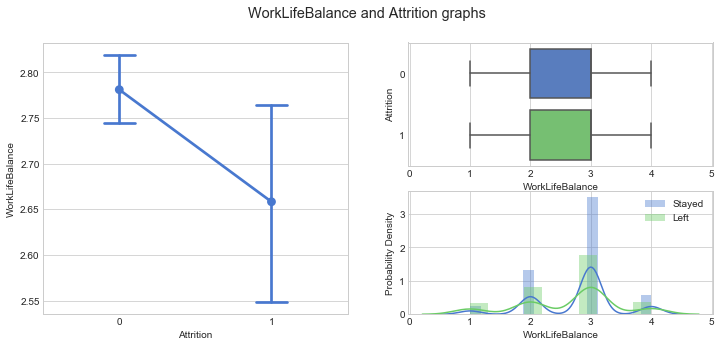

None


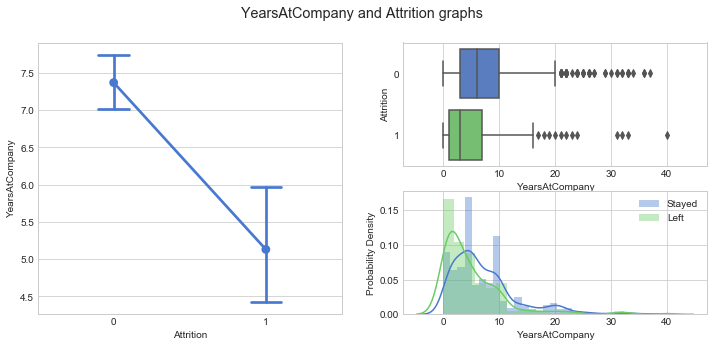

None


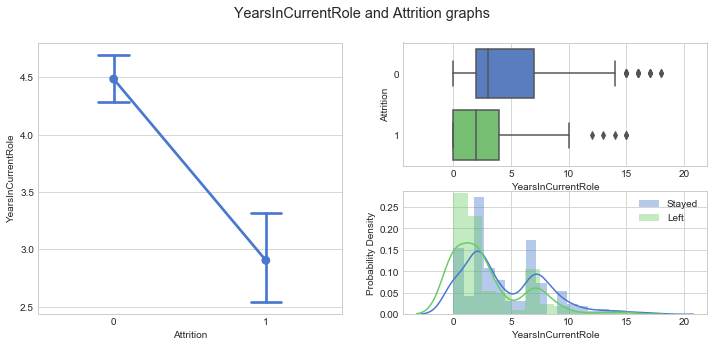

None


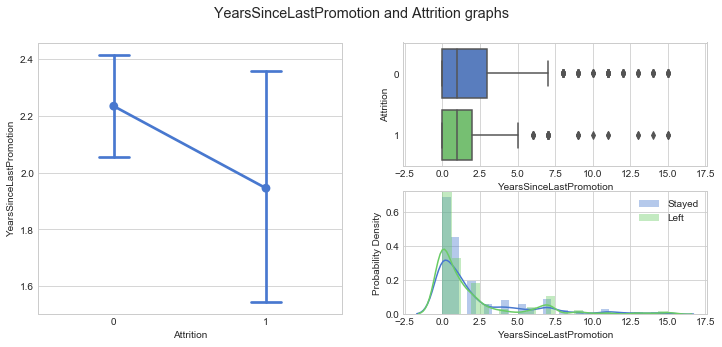

None


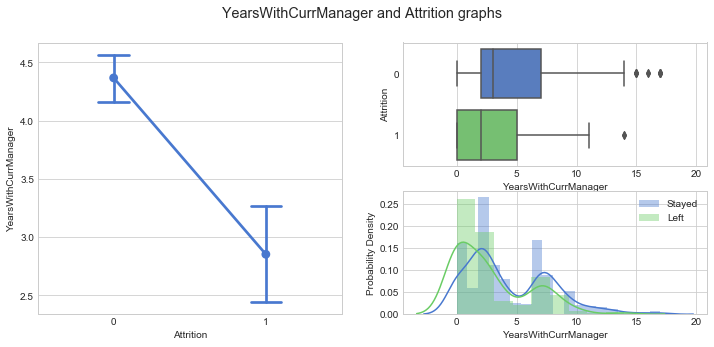

None


In [20]:
# CREATE graphs
#

#MakeGraph(DATA,INPUT,RESPONSE)

In [13]:
# START machine learning
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# something
# something else
# finish

In [14]:
# SPLIT data
def SPLIT_DATA(DATA=encoding, RAND=True):
    x_train, x_test, y_train, y_test = train_test_split(DATA.drop("Attrition",axis=1), DATA["Attrition"], test_size = 0.3)
    
    if RAND == True:
        list_of_random_items = GET_RANDOM(DATA=x_train)
        #x_train.drop(list_of_random_items, axis = 1, inplace= True)

        [DataSet.drop(list_of_random_items, axis = 1, inplace = True) for DataSet in [x_train,x_test]]
    
    return x_train, x_test, y_train, y_test

# RANDOM variable selection
def GET_RANDOM(DATA):
    group_of_items = set(DATA.columns)
    num_to_select = np.random.randint(1,len(group_of_items))
    list_of_random_items = random.sample(group_of_items, num_to_select)
    
    return list_of_random_items

def TRAIN_MODEL(RAND=True):
    x_train, x_test, y_train, y_test = SPLIT_DATA(RAND=RAND)
    LogReg = LogisticRegression()    
    LRF = LogReg.fit(x_train,y_train)
    TM_score = LogReg.score(x_test,y_test)
    PREDICTIONS = LogReg.predict(x_test)
    ConfMatrix = confusion_matrix(y_test, PREDICTIONS)
    INCORRECT_T1,INCORRECT_T2 = TITII(DATA = ConfMatrix)
    
    OUTLIST = [TM_score, INCORRECT_T1, INCORRECT_T2, len(x_train.columns), x_train.columns.tolist(), ConfMatrix]    
    return OUTLIST

def TITII(DATA):
    CORRECT_TRUE = DATA[-1,-1]/DATA[-1,:].sum()
    INCORRECT_T2 = 1-CORRECT_TRUE
    CORRECT_FALSE = DATA[0,0]/DATA[0,:].sum()
    INCORRECT_T1 = 1-CORRECT_FALSE
    
    return INCORRECT_T1,INCORRECT_T2    

In [15]:
ModelResults = []
for i in range(0,50):
    ModelResults.append(TRAIN_MODEL())
    if i % 100 == 0:
        print(i)
    
    # Store on local drive in case of crashes
    #WriteIO.GetFile(Mode="a", WriteString = TRAIN_MODEL())
    
ModelResults = pd.DataFrame(ModelResults)
#ModelResults[4] = ModelResults[3].str.len()

0


In [16]:
SCORES = []
with open("IDnumbers") as f:
    for line in f:
        line_data = [line for line in line.split(",")]
        SCORE = [float(scores.strip("[]")) for scores in line_data[0:4]]
        SCORES.append(SCORE)  

In [17]:
SCORES = pd.DataFrame(SCORES)
SCORES.rename(columns={0:"Score", 1:"Error1",2:"Error2",3:"NVars"}, inplace=True)

Median Score and Error2 for Number of Variables


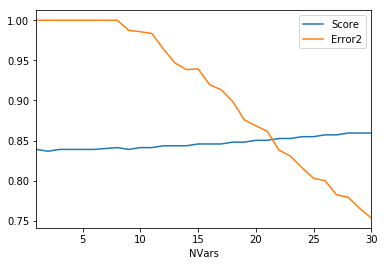

Total observations : 15681


In [18]:
# GRAPH
print("Median Score and Error2 for Number of Variables")
SCORES.groupby("NVars")[["Score","Error2"]].median().plot()
plt.show()
print("Total observations : {}".format(len(SCORES.Score)))

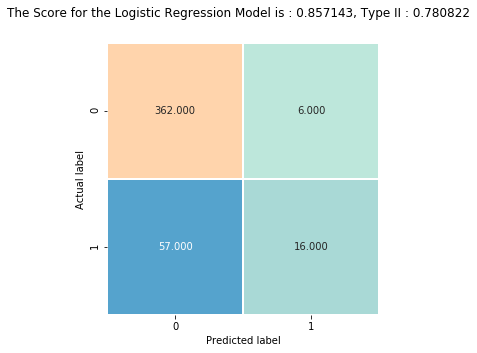

In [19]:
# ALL 30 variables:

LRM = TRAIN_MODEL(RAND=False)

plt.figure(figsize=(5,5))
sns.heatmap(LRM[5], annot=True, fmt=".3f", linewidths=1, square=True, cmap="icefire", cbar=False)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

plt.suptitle("The Score for the Logistic Regression Model is : {:f}, Type II : {:f}".format(LRM[0], LRM[2]))
plt.show()